In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [3]:
data = pd.read_csv("fraudTest.csv")

In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [11]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['gender']=encoder.fit_transform(data['gender'])

In [12]:
unused_cols=['Unnamed: 0','cc_num','merch_lat','merch_long','zip','first','last','unix_time','street','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [13]:
data.head()

,category,amt,gender,lat,long,city_pop,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
0,10,2.86,1,33.9659,-80.9355,333497,0,21,6,2020,12,14
1,10,29.84,0,40.3207,-110.4360,302,0,21,6,2020,12,14
2,5,41.28,0,40.6729,-73.5365,34496,0,21,6,2020,12,14
3,9,60.05,1,28.5697,-80.8191,54767,0,21,6,2020,12,15
4,13,3.19,1,44.2529,-85.0170,1126,0,21,6,2020,12,15


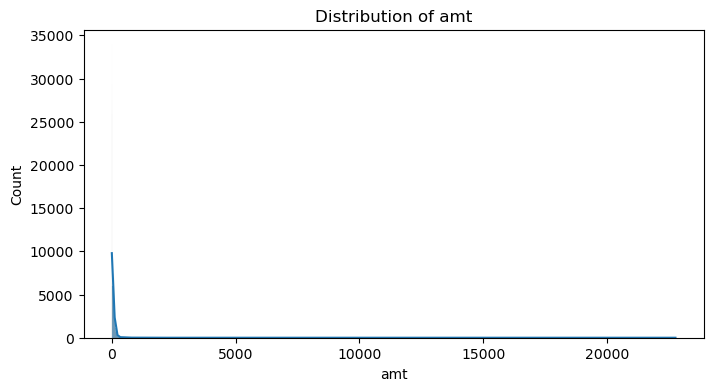

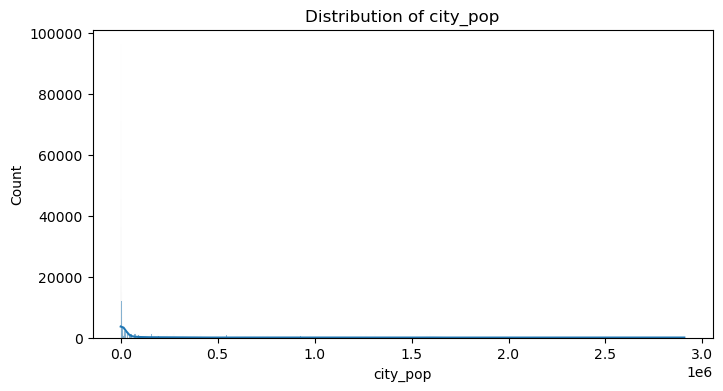

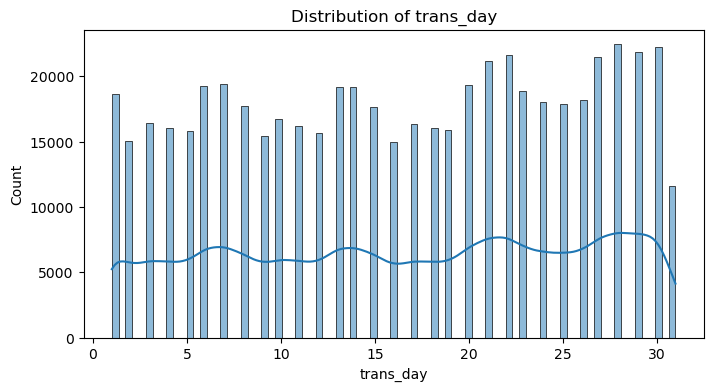

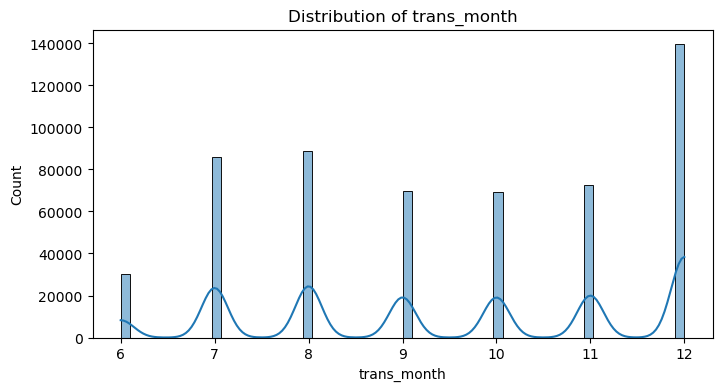

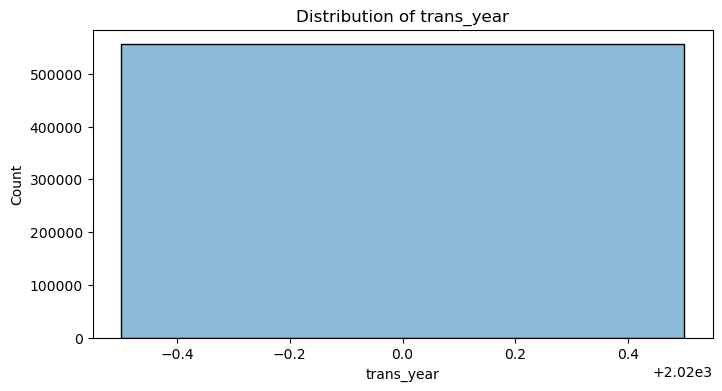

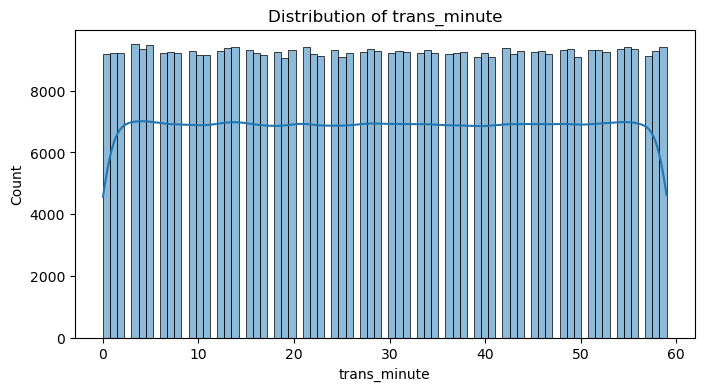

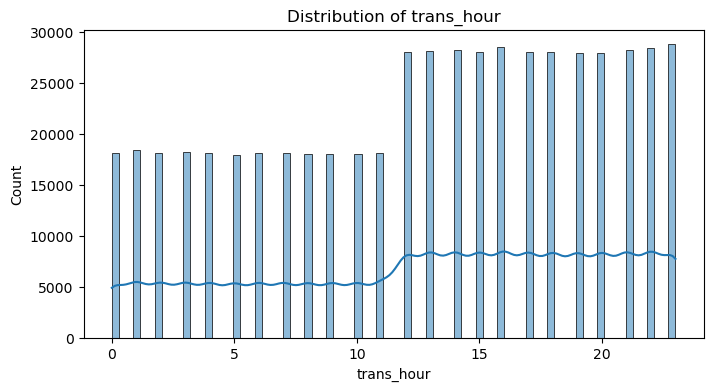

In [14]:
numerical_cols = ['amt', 'city_pop', 'trans_day', 'trans_month', 'trans_year', 'trans_minute', 'trans_hour']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

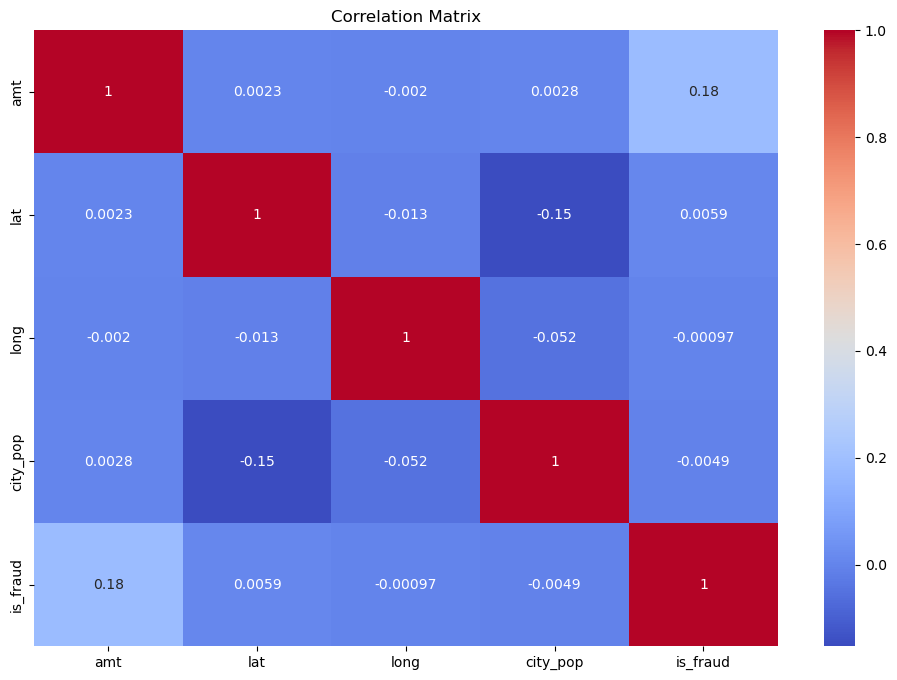

In [15]:
# Correlation Heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

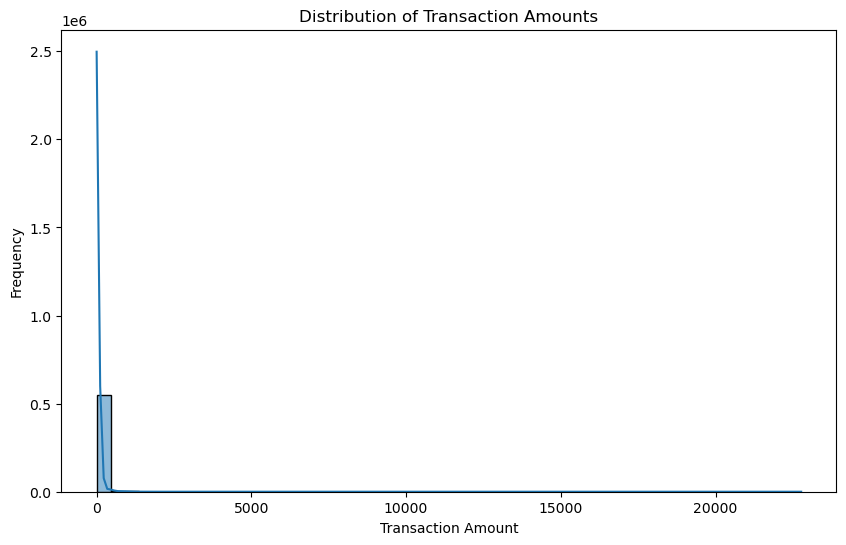

In [16]:
# Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Missing values:
 Series([], dtype: int64)


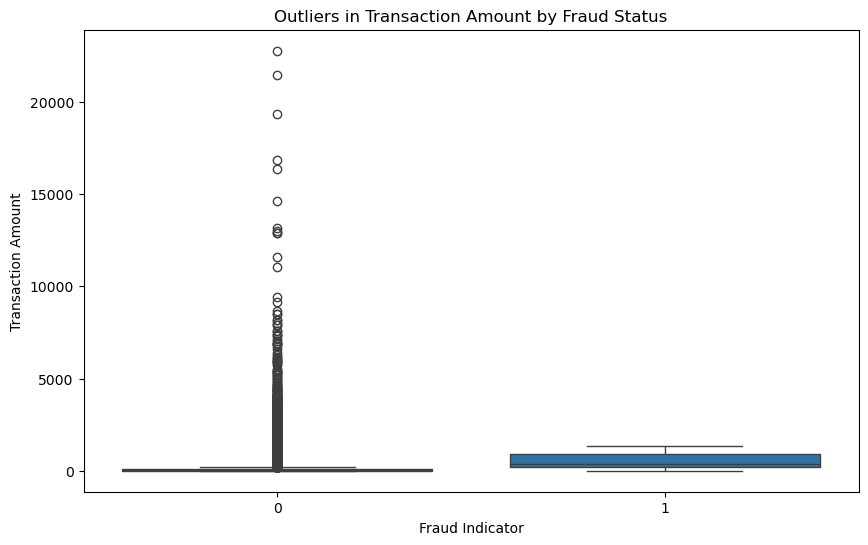

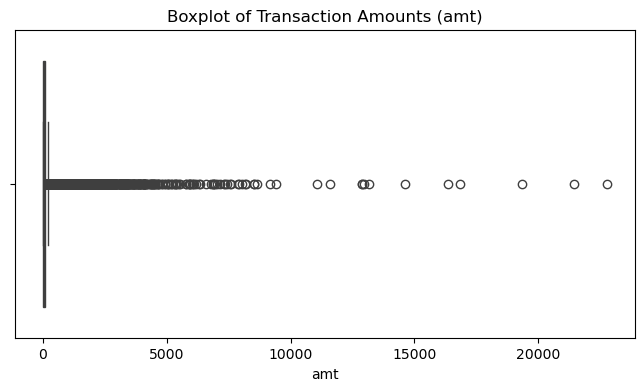

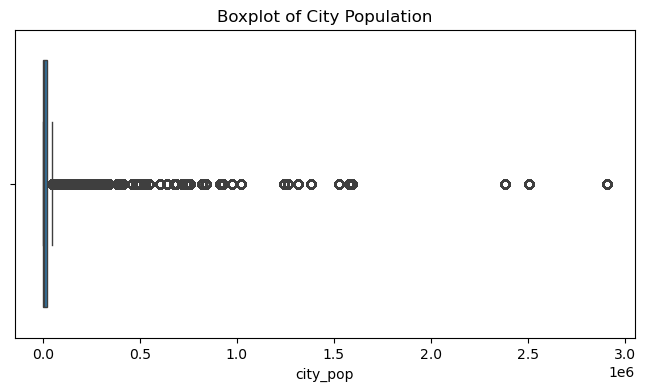

In [17]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Outlier Detection (Transaction Amount by Fraud Indicator)
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Outliers in Transaction Amount by Fraud Status')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.show()

# Boxplot for 'amt' to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x='amt', data=data)
plt.title('Boxplot of Transaction Amounts (amt)')
plt.show()

# Boxplot for 'city_pop' to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x='city_pop', data=data)
plt.title('Boxplot of City Population')
plt.show()


In [18]:
data.head(10)

,category,amt,gender,lat,long,city_pop,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
0,10,2.86,1,33.9659,-80.9355,333497,0,21,6,2020,12,14
1,10,29.84,0,40.3207,-110.4360,302,0,21,6,2020,12,14
2,5,41.28,0,40.6729,-73.5365,34496,0,21,6,2020,12,14
3,9,60.05,1,28.5697,-80.8191,54767,0,21,6,2020,12,15
4,13,3.19,1,44.2529,-85.0170,1126,0,21,6,2020,12,15


In [19]:
target = data['is_fraud']
data = data.drop(columns=['is_fraud'])
data['is_fraud'] = target

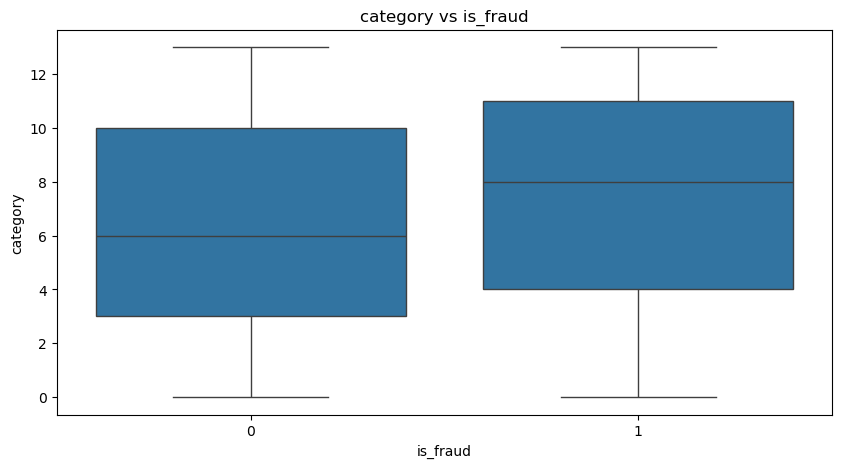

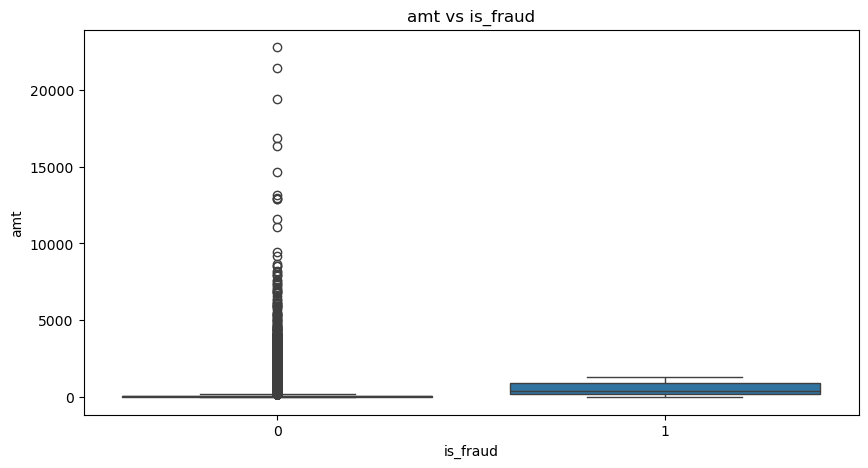

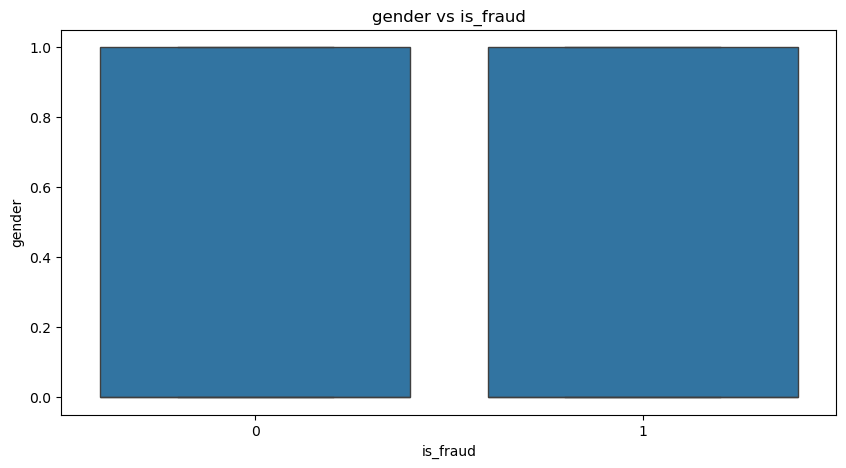

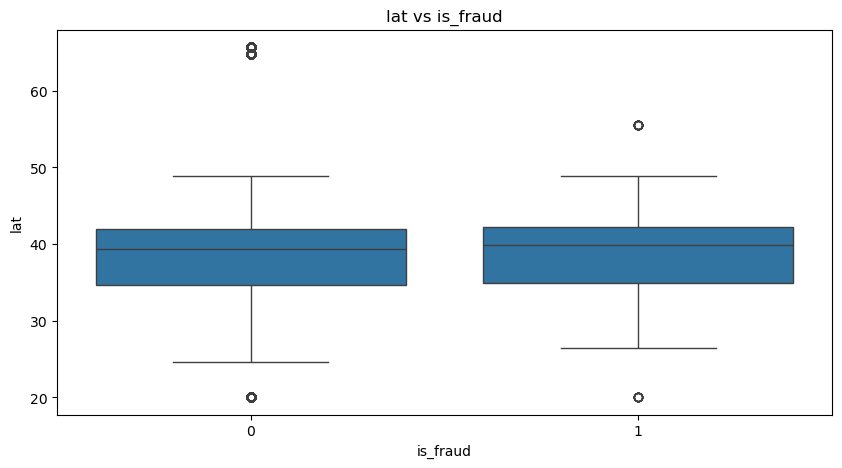

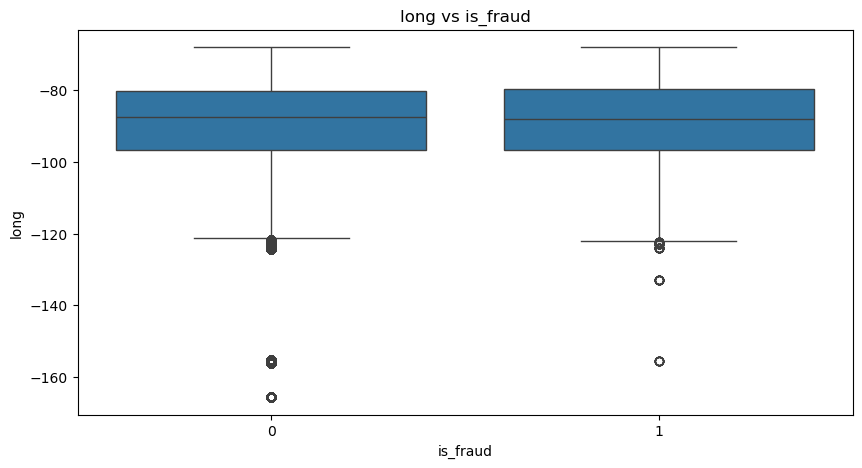

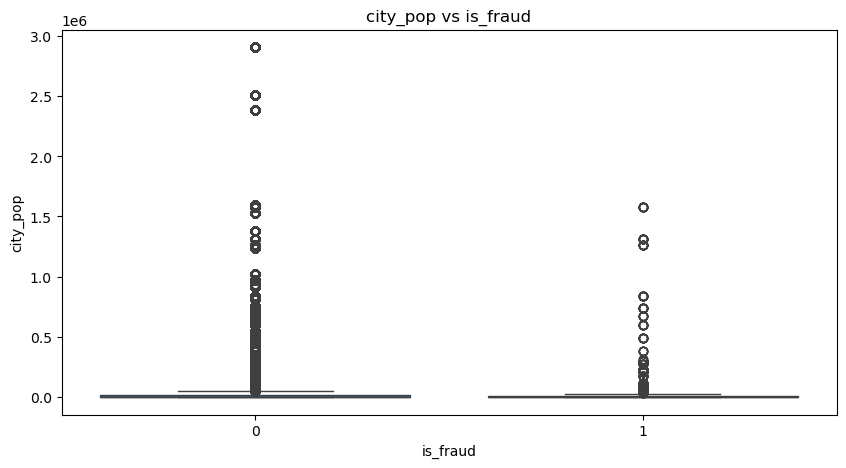

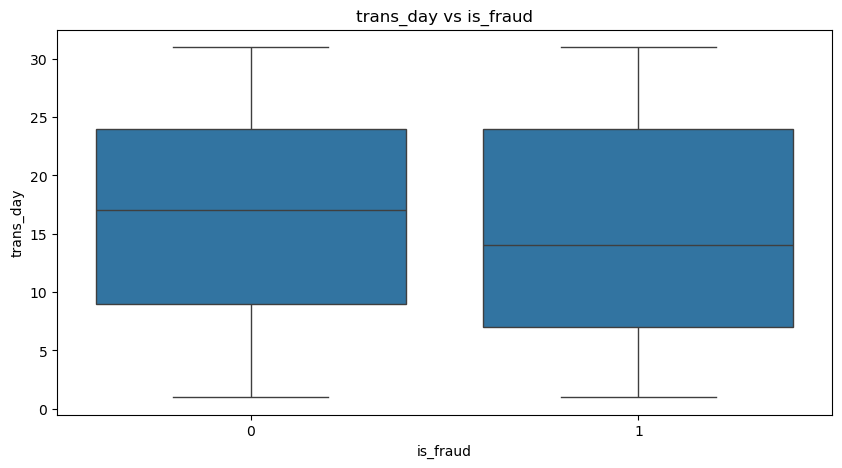

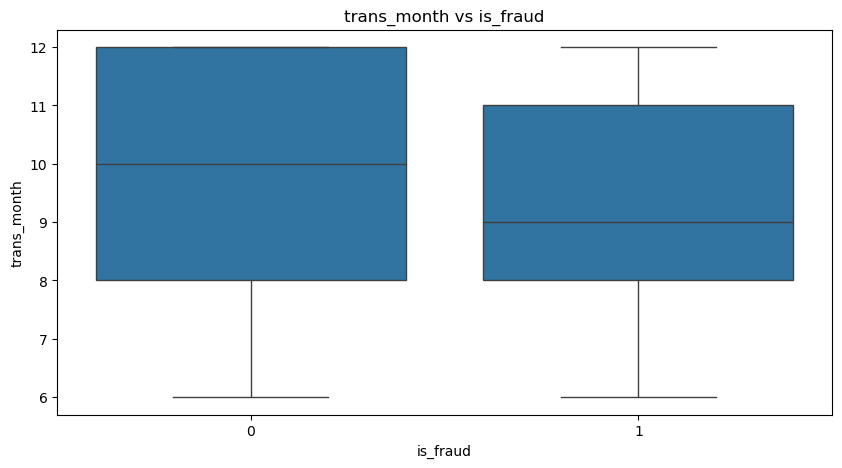

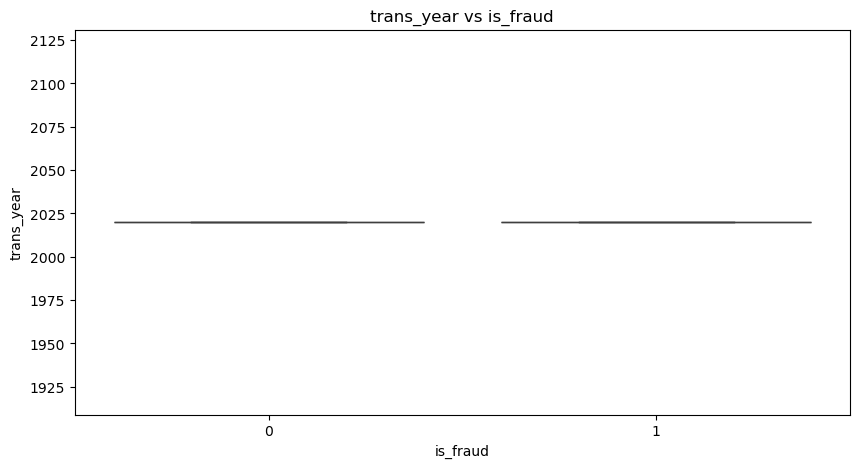

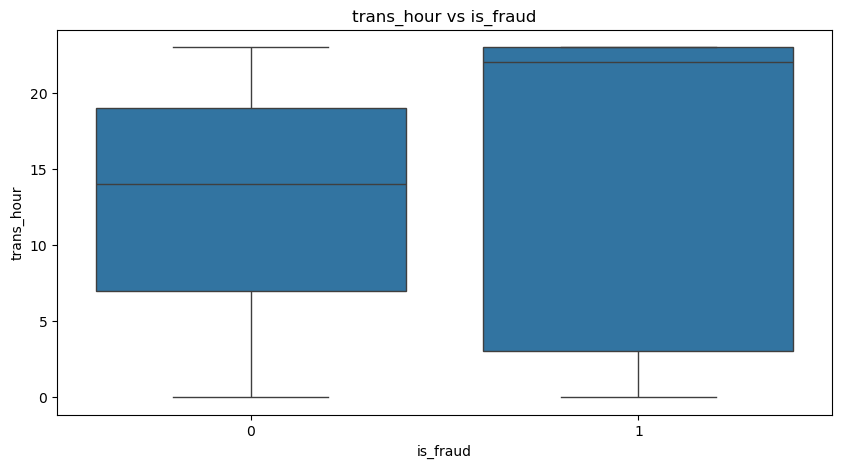

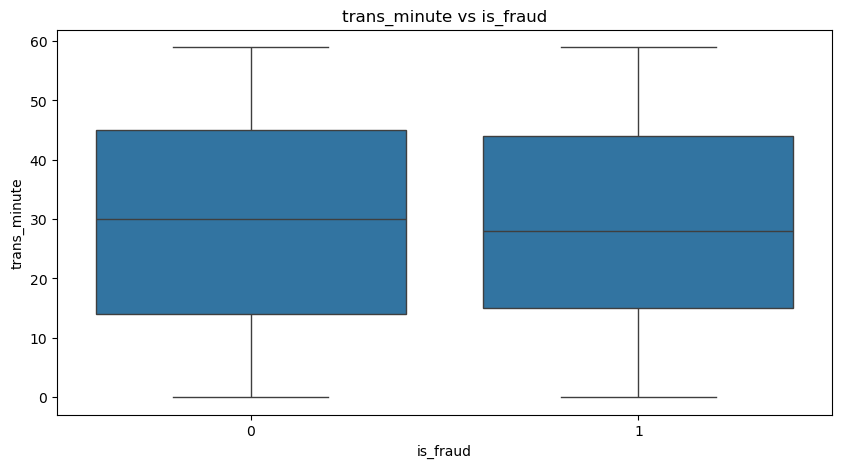

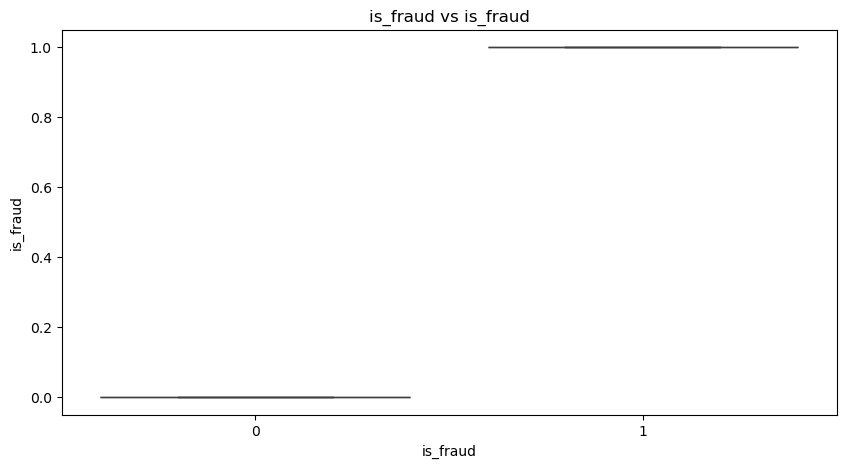

In [20]:
# Visualize relationships between features and target variable
numerical_features = data.select_dtypes(include=['float64', 'int64', 'int32'])
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='is_fraud', y=col, data=data)
    plt.title(f'{col} vs is_fraud')
    plt.show()



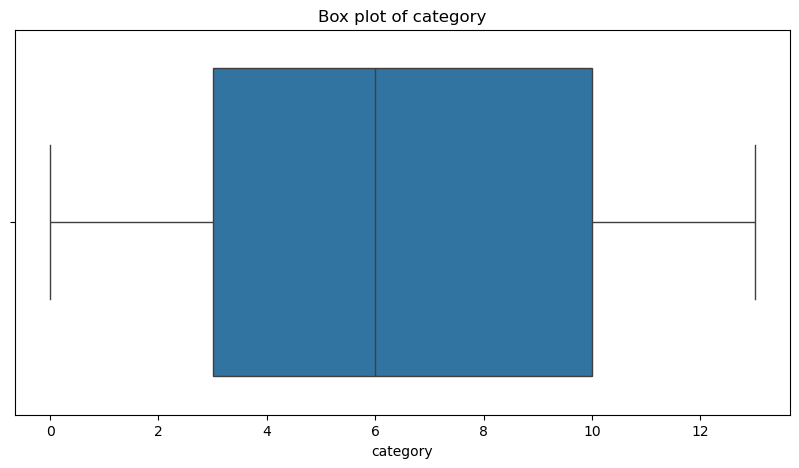

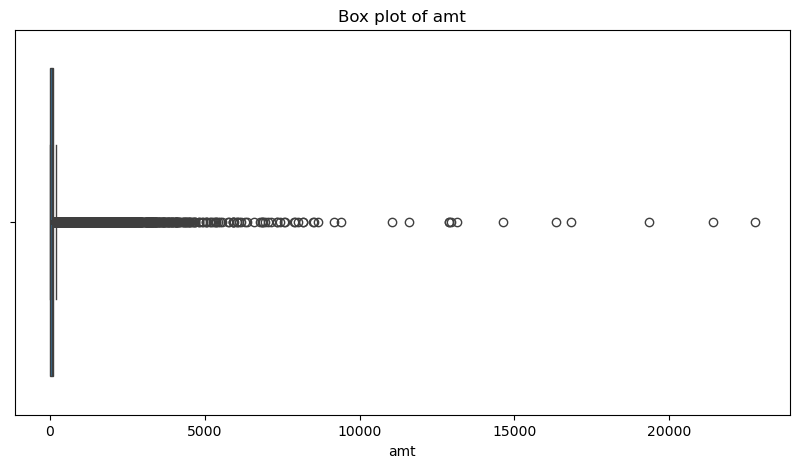

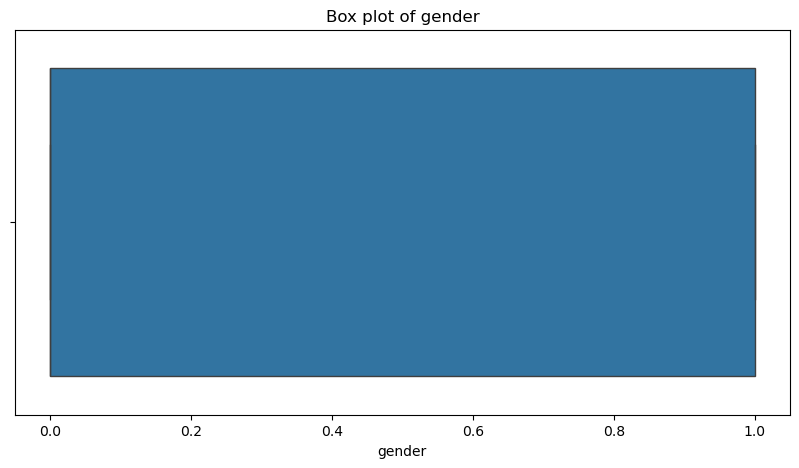

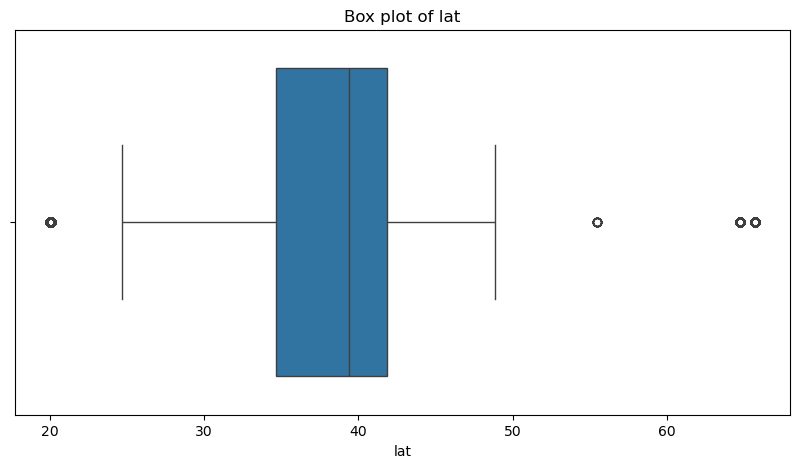

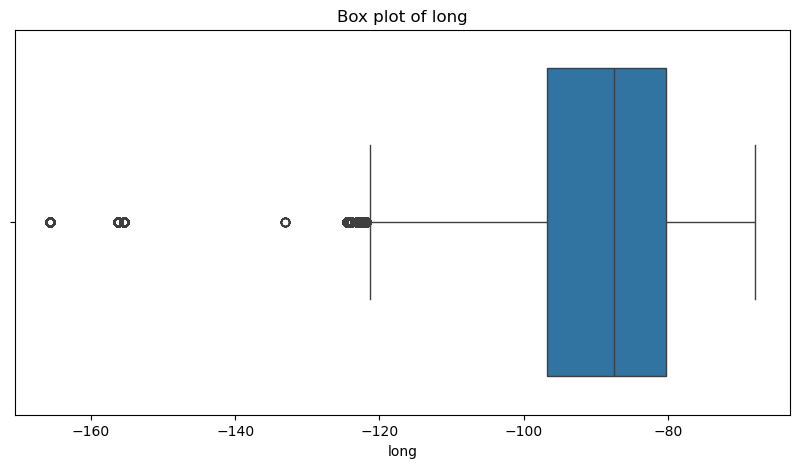

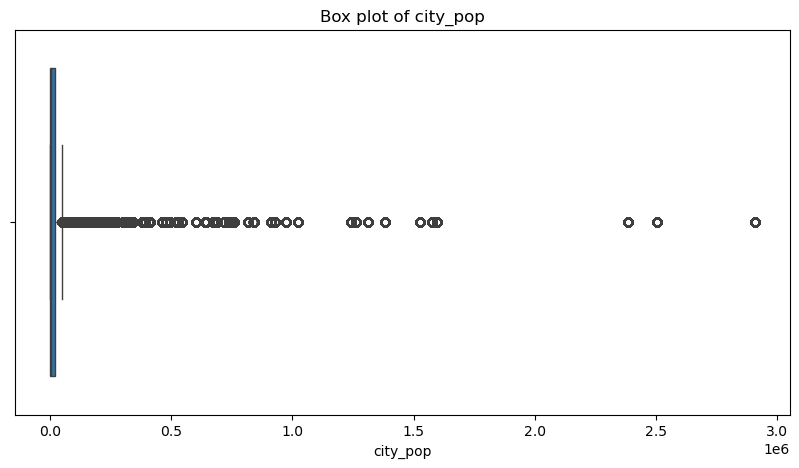

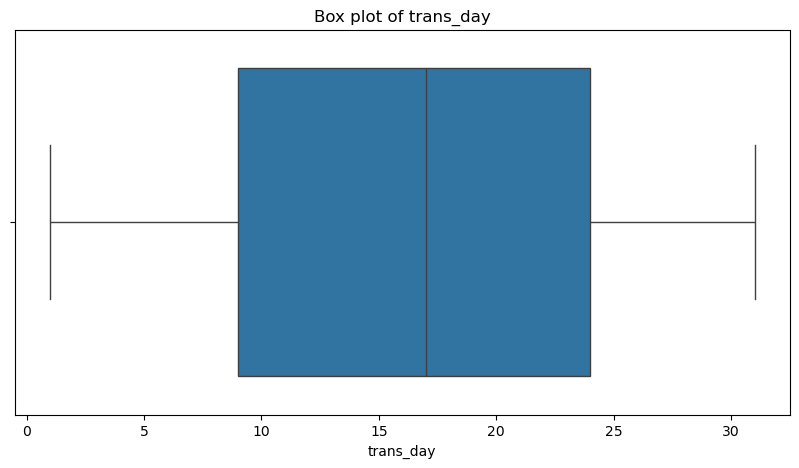

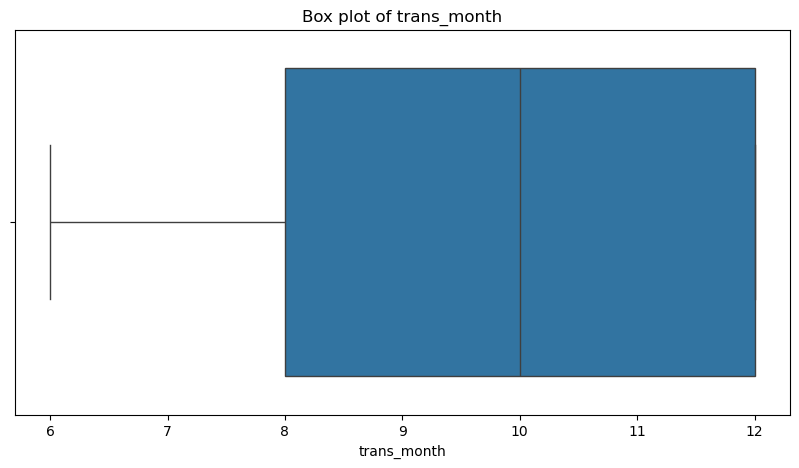

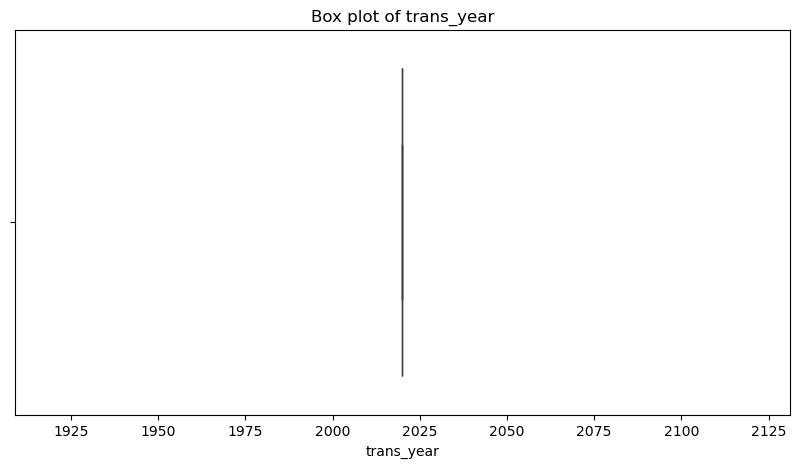

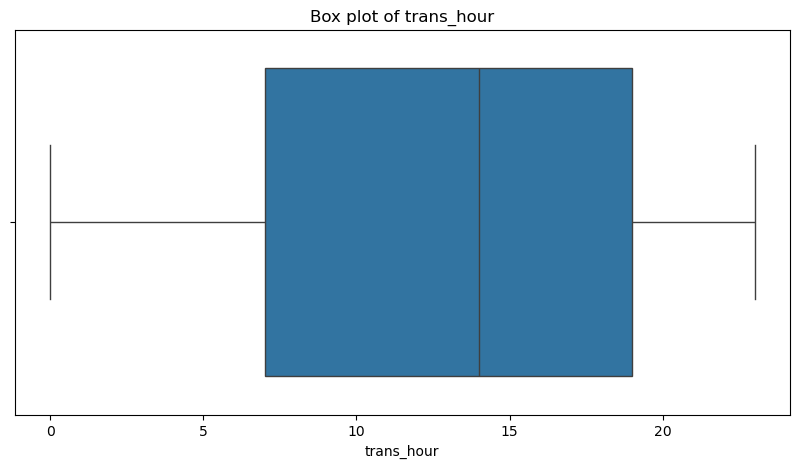

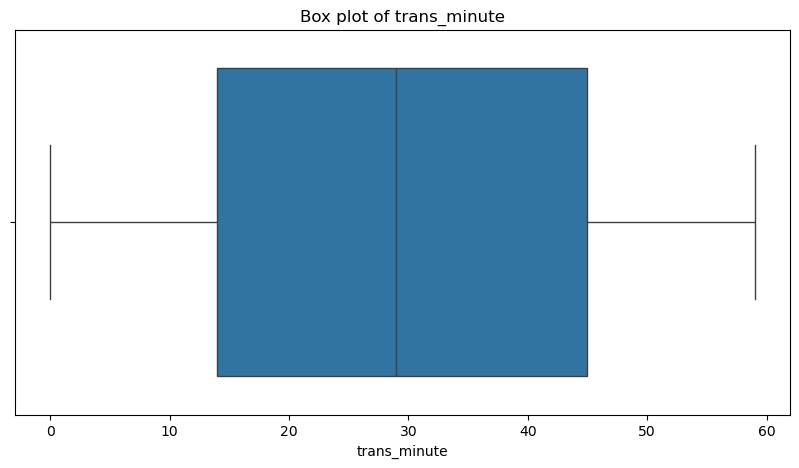

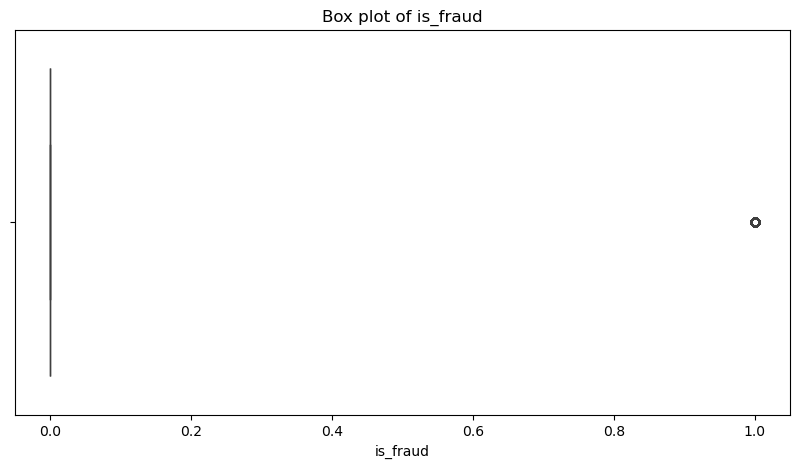

In [21]:
# Outlier detection and visualization
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [22]:
corr_matrix = data.corr()
corr_matrix

,category,amt,gender,lat,long,city_pop,trans_day,trans_month,trans_year,trans_hour,trans_minute,is_fraud
category,1.000000,0.026811,-0.027684,-0.008215,-0.002902,0.009164,0.000558,0.000264,NaN,0.157214,-0.001568,0.016980
amt,0.026811,1.000000,0.000027,0.002339,-0.002046,0.002760,-0.000829,-0.000717,NaN,-0.029860,0.000679,0.182267
gender,-0.027684,0.000027,1.000000,0.042692,0.051235,-0.029367,0.000382,-0.000445,NaN,-0.038515,0.001821,0.000748
lat,-0.008215,0.002339,0.042692,1.000000,-0.012892,-0.152666,-0.002297,0.000686,NaN,-0.010676,-0.000780,0.005863
long,-0.002902,-0.002046,0.051235,-0.012892,1.000000,-0.051524,0.000334,-0.001510,NaN,-0.001595,-0.000117,-0.000972
city_pop,0.009164,0.002760,-0.029367,-0.152666,-0.051524,1.000000,0.001938,-0.001117,NaN,0.018937,0.000395,-0.004910
trans_day,0.000558,-0.000829,0.000382,-0.002297,0.000334,0.001938,1.000000,-0.104058,NaN,-0.000161,0.001885,-0.009203
trans_month,0.000264,-0.000717,-0.000445,0.000686,-0.001510,-0.001117,-0.104058,1.000000,NaN,-0.004995,-0.001230,-0.011748
trans_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trans_hour,0.157214,-0.029860,-0.038515,-0.010676,-0.001595,0.018937,-0.000161,-0.004995,NaN,1.000000,-0.000723,0.011686


In [23]:
X = data.drop(columns = ['is_fraud'])
y = data['is_fraud']

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [25]:
std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

print(X.tail())
print(y.tail())

         category       amt    gender       lat      long  city_pop  \
1107143  1.173689  2.188420 -0.813701 -0.550810  0.192743 -0.274339   
1107144 -0.721983  0.196617 -0.813701 -0.702173 -0.414789 -0.284191   
1107145 -0.721983 -0.016231 -0.813701  0.944910  0.258580 -0.281405   
1107146  1.173689  1.379362 -0.813701 -1.292009 -0.612117 -0.288314   
1107147 -1.263603  0.618924  1.228952 -0.730254  0.056660 -0.253711   

         trans_day  trans_month  trans_year  trans_hour  trans_minute  
1107143  -0.308443    -0.667543         0.0   -1.704896     -0.752107  
1107144  -0.541239     0.970748         0.0   -1.447395      0.942901  
1107145   1.321124     0.424651         0.0    1.127619     -1.317110  
1107146  -1.239625    -0.121446         0.0    1.127619      1.507904  
1107147  -1.006829    -0.121446         0.0   -0.031137      0.691789  
1107143    1
1107144    1
1107145    1
1107146    1
1107147    1
Name: is_fraud, dtype: int64


In [26]:
import joblib
# Save the scaler to the directory
joblib.dump(std_scaler, 'scaler.pkl')

# Print a confirmation message
print(f"Scaler saved to {'scaler.pkl'}")

Scaler saved to scaler.pkl


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=86, stratify=y
)

In [28]:
X_train

,category,amt,gender,lat,long,city_pop,trans_day,trans_month,trans_year,trans_hour,trans_minute
785852,0.361258,1.828954,-0.813701,-0.106602,0.729613,-0.287735,0.622738,-0.121446,0.0,1.127619,0.817345
750547,-0.721983,-0.031890,-0.813701,-1.018725,-1.622114,4.708078,-0.075648,0.424651,0.0,-1.576146,-0.124326
214368,-1.263603,-0.546578,1.228952,-0.524959,0.775355,-0.236280,-1.239625,-0.121446,0.0,-0.417390,1.256792
491014,0.090448,-0.778327,-0.813701,0.029804,0.079385,-0.282969,0.157147,1.516845,0.0,0.355115,0.377898
543517,-0.721983,-0.620634,1.228952,0.235509,0.308717,3.174827,1.553920,1.516845,0.0,-1.576146,1.445126
...,...,...,...,...,...,...,...,...,...,...,...
48250,1.715309,0.622468,1.228952,1.428458,0.436386,-0.289498,-1.006829,-1.213640,0.0,0.097613,0.942901
758495,-0.721983,0.021747,1.228952,0.869144,-0.304455,-0.286388,-1.006829,0.424651,0.0,0.870117,0.189564
704067,-0.721983,0.058807,1.228952,-1.266550,0.528438,-0.289433,-0.890432,-0.121446,0.0,1.127619,-1.003220
153304,-0.451173,-0.743614,-0.813701,-1.462806,0.603665,-0.284819,-0.308443,-0.667543,0.0,1.127619,0.880123


In [29]:
# Print the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (885718, 11)
Training labels shape: (885718,)
Test features shape: (221430, 11)
Test labels shape: (221430,)


In [56]:
# save all training into the training and test files
#test_dir = '../data/test'
#train_dir = '../data/train'

In [58]:
import os
# Save the training and test datasets as CSV files
pd.DataFrame(X_train).to_csv(os.path.join('X_train.csv'), index=False)
pd.DataFrame(X_test).to_csv(os.path.join('X_test.csv'), index=False)
pd.DataFrame(y_train).to_csv(os.path.join('y_train.csv'), index=False)
pd.DataFrame(y_test).to_csv(os.path.join('y_test.csv'), index=False)

In [59]:
# Load the data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [60]:
# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor="val_loss", patience=30, restore_best_weights=True
)
check_point = ModelCheckpoint("training/model.{epoch:03d}.keras", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.0001)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    verbose=1,
    mode='min',
    min_lr=1e-6
)


In [62]:
from keras.models import Sequential
from keras.layers import Dense


vanilla = Sequential()
vanilla.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
vanilla.add(Dense(32, activation="relu"))
vanilla.add(Dense(1, activation="sigmoid"))
vanilla.summary()

C:\Users\gnond\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
vanilla.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"],
)

vanilla_train = vanilla.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

Epoch 1/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - Precision: 0.9119 - Recall: 0.8596 - accuracy: 0.8881 - loss: 0.2639 - val_Precision: 0.9440 - val_Recall: 0.9265 - val_accuracy: 0.9358 - val_loss: 0.1576
Epoch 2/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - Precision: 0.9442 - Recall: 0.9360 - accuracy: 0.9402 - loss: 0.1491 - val_Precision: 0.9517 - val_Recall: 0.9433 - val_accuracy: 0.9478 - val_loss: 0.1336
Epoch 3/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - Precision: 0.9514 - Recall: 0.9456 - accuracy: 0.9486 - loss: 0.1309 - val_Precision: 0.9388 - val_Recall: 0.9641 - val_accuracy: 0.9507 - val_loss: 0.1260
Epoch 4/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - Precision: 0.9543 - Recall: 0.9503 - accuracy: 0.9525 - loss: 0.1221 - val_Precision: 0.9639 - val_Recall: 0.9385 - val_accuracy: 0.9517 - val_loss: 0.1234
Epoch 5/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - Precision: 0.9565 - Recall: 0.9535 - accuracy: 0.9551 - loss: 0.1167 - val_P

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - Precision: 0.9620 - Recall: 0.9703 - accuracy: 0.9659 - loss: 0.1086 - val_Precision: 0.9496 - val_Recall: 0.9796 - val_accuracy: 0.9638 - val_loss: 0.1196
Epoch 63/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - Precision: 0.9626 - Recall: 0.9704 - accuracy: 0.9663 - loss: 0.1063 - val_Precision: 0.9666 - val_Recall: 0.9643 - val_accuracy: 0.9655 - val_loss: 0.1066
Epoch 65/100
 5028/22143 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - Precision: 0.9628 - Recall: 0.9716 - accuracy: 0.9670 - loss: 0.1064

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - Precision: 0.9615 - Recall: 0.9697 - accuracy: 0.9655 - loss: 0.1092 - val_Precision: 0.9651 - val_Recall: 0.9630 - val_accuracy: 0.9642 - val_loss: 0.1092
Epoch 67/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - Precision: 0.9614 - Recall: 0.9692 - accuracy: 0.9651 - loss: 0.1099 - val_Precision: 0.9638 - val_Recall: 0.9673 - val_accuracy: 0.9655 - val_loss: 0.1191
Epoch 69/100
 1499/22143 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - Precision: 0.9598 - Recall: 0.9678 - accuracy: 0.9638 - loss: 0.1118

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - Precision: 0.9615 - Recall: 0.9693 - accuracy: 0.9653 - loss: 0.1092 - val_Precision: 0.9730 - val_Recall: 0.9524 - val_accuracy: 0.9630 - val_loss: 0.1145
Epoch 70/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - Precision: 0.9615 - Recall: 0.9693 - accuracy: 0.9653 - loss: 0.1093 - val_Precision: 0.9607 - val_Recall: 0.9728 - val_accuracy: 0.9666 - val_loss: 0.1044
Epoch 72/100
 9124/22143 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - Precision: 0.9627 - Recall: 0.9704 - accuracy: 0.9665 - loss: 0.1073

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



20514/22143 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.9620 - Recall: 0.9696 - accuracy: 0.9656 - loss: 0.1123

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - Precision: 0.9617 - Recall: 0.9699 - accuracy: 0.9657 - loss: 0.1129 - val_Precision: 0.9522 - val_Recall: 0.9795 - val_accuracy: 0.9652 - val_loss: 0.1164
Epoch 77/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - Precision: 0.9614 - Recall: 0.9687 - accuracy: 0.9650 - loss: 0.1161 - val_Precision: 0.9696 - val_Recall: 0.9581 - val_accuracy: 0.9641 - val_loss: 0.1175
Epoch 78/100
14654/22143 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - Precision: 0.9609 - Recall: 0.9690 - accuracy: 0.9648 - loss: 0.1255

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - Precision: 0.9610 - Recall: 0.9691 - accuracy: 0.9649 - loss: 0.1226 - val_Precision: 0.9607 - val_Recall: 0.9713 - val_accuracy: 0.9658 - val_loss: 0.1165
Epoch 79/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - Precision: 0.9618 - Recall: 0.9700 - accuracy: 0.9657 - loss: 0.1174 - val_Precision: 0.9645 - val_Recall: 0.9678 - val_accuracy: 0.9661 - val_loss: 0.1089
Epoch 81/100
10937/22143 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - Precision: 0.9616 - Recall: 0.9695 - accuracy: 0.9655 - loss: 0.1168

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - Precision: 0.9618 - Recall: 0.9695 - accuracy: 0.9655 - loss: 0.1154 - val_Precision: 0.9586 - val_Recall: 0.9737 - val_accuracy: 0.9659 - val_loss: 0.1075
Epoch 82/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - Precision: 0.9622 - Recall: 0.9699 - accuracy: 0.9659 - loss: 0.1137 - val_Precision: 0.9660 - val_Recall: 0.9614 - val_accuracy: 0.9638 - val_loss: 0.1114
Epoch 84/100
18931/22143 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Precision: 0.9625 - Recall: 0.9705 - accuracy: 0.9663 - loss: 0.1095

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - Precision: 0.9620 - Recall: 0.9698 - accuracy: 0.9657 - loss: 0.1145 - val_Precision: 0.9465 - val_Recall: 0.9837 - val_accuracy: 0.9641 - val_loss: 0.1106
Epoch 87/100
 4609/22143 ━━━━━━━━━━━━━━━━━━━━ 1:03 4ms/step - Precision: 0.9623 - Recall: 0.9710 - accuracy: 0.9664 - loss: 0.1083

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - Precision: 0.9630 - Recall: 0.9701 - accuracy: 0.9664 - loss: 0.1096 - val_Precision: 0.9630 - val_Recall: 0.9659 - val_accuracy: 0.9644 - val_loss: 0.1091
Epoch 89/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - Precision: 0.9624 - Recall: 0.9696 - accuracy: 0.9658 - loss: 0.1137 - val_Precision: 0.9598 - val_Recall: 0.9737 - val_accuracy: 0.9665 - val_loss: 0.1005
Epoch 91/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 1552s 70ms/step - Precision: 0.9627 - Recall: 0.9691 - accuracy: 0.9657 - loss: 0.1086 - val_Precision: 0.9612 - val_Recall: 0.9625 - val_accuracy: 0.9618 - val_loss: 0.1102
Epoch 95/100
14294/22143 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - Precision: 0.9621 - Recall: 0.9696 - accuracy: 0.9657 - loss: 0.1137

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



22143/22143 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - Precision: 0.9620 - Recall: 0.9695 - accuracy: 0.9657 - loss: 0.1128 - val_Precision: 0.9512 - val_Recall: 0.9807 - val_accuracy: 0.9652 - val_loss: 0.1165
Epoch 98/100
22143/22143 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - Precision: 0.9626 - Recall: 0.9709 - accuracy: 0.9667 - loss: 0.1105 - val_Precision: 0.9651 - val_Recall: 0.9569 - val_accuracy: 0.9612 - val_loss: 0.1152
Epoch 100/100
16811/22143 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Precision: 0.9625 - Recall: 0.9699 - accuracy: 0.9660 - loss: 0.1116

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



6920/6920 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


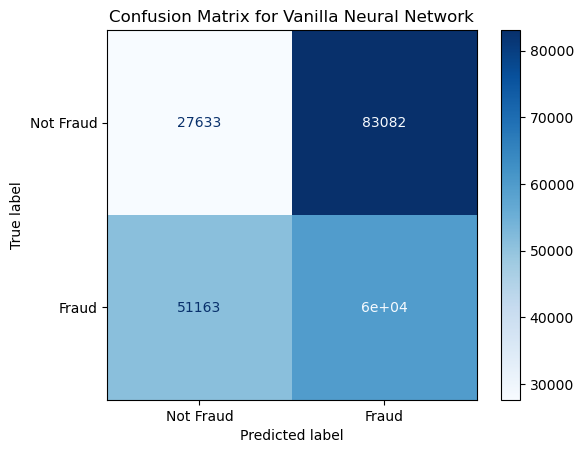

Confusion Matrix:
 [[27633 83082]
 [51163 59552]]


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions
y_pred_prob = vanilla.predict(X_test_scaled)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int)      # Convert to binary predictions (0 or 1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Vanilla Neural Network")
plt.show()

# Print the confusion matrix as a numeric array (optional)
print("Confusion Matrix:\n", cm)
